# Visualisation des Résultats d'Entraînement et d'Évaluation du Système JibJobRecSys
Ce notebook permet de charger et de visualiser les courbes de perte (loss), les métriques d'évaluation, et d'afficher les recommandations Top-N pour un professionnel donné à partir des sorties sauvegardées par `main.py`.

In [10]:
# Imports nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os

## 1. Chargement de l'historique d'entraînement

In [11]:
# Charger l'historique d'entraînement
history_path = '../results/training_history.csv'
history_df = pd.read_csv(history_path)
history_df.head()

,train_loss,val_loss
0,0.693276,0.690395
1,0.690729,0.684745
2,0.685632,0.675945
3,0.678421,0.664104
4,0.661117,0.647202


## 2. Courbes de perte (Loss) d'entraînement et de validation

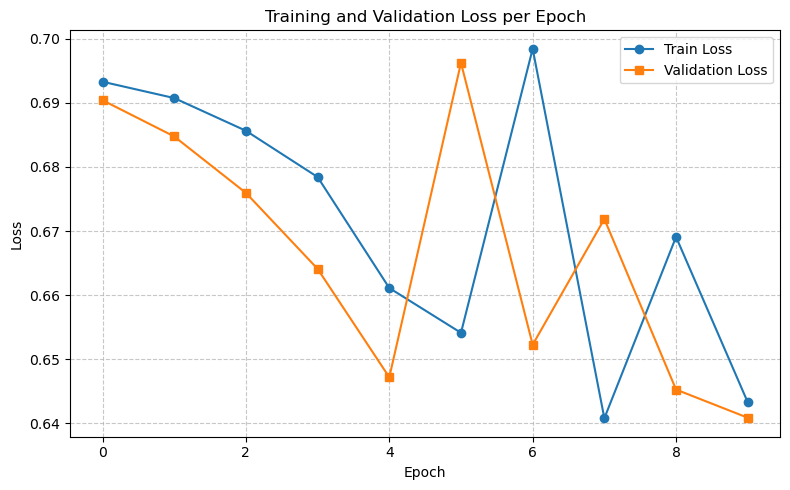

In [12]:
plt.figure(figsize=(8,5))
plt.plot(history_df['train_loss'], label='Train Loss', marker='o')
plt.plot(history_df['val_loss'], label='Validation Loss', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss per Epoch')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
# Créer le dossier visualizations si besoin
os.makedirs('../visualizations', exist_ok=True)
plt.savefig('../visualizations/loss_curves.png')
plt.show()

## 3. Chargement des métriques d'évaluation

In [13]:
# Charger les métriques d'évaluation
metrics_path = '../results/evaluation_metrics.json'
with open(metrics_path, 'r') as f:
    metrics = json.load(f)
metrics

{'Precision@5': 0.154,
 'Recall@5': 0.08711904761904762,
 'NDCG@5': 0.14093013478301297,
 'Precision@10': 0.16899999999999998,
 'Recall@10': 0.19195634920634919,
 'NDCG@10': 0.16829128958092734,
 'Precision@20': 0.149,
 'Recall@20': 0.33721428571428574,
 'NDCG@20': 0.2445761363231317,
 'AUC-ROC': 0.6617601984126982,
 'MAE': 0.4309872214753872,
 'RMSE': 0.44701111333499166}

## 4. Diagramme en barres des métriques d'évaluation

C:\Users\hp\AppData\Local\Temp\ipykernel_16128\1925925671.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_names, y=metric_values, palette='viridis')


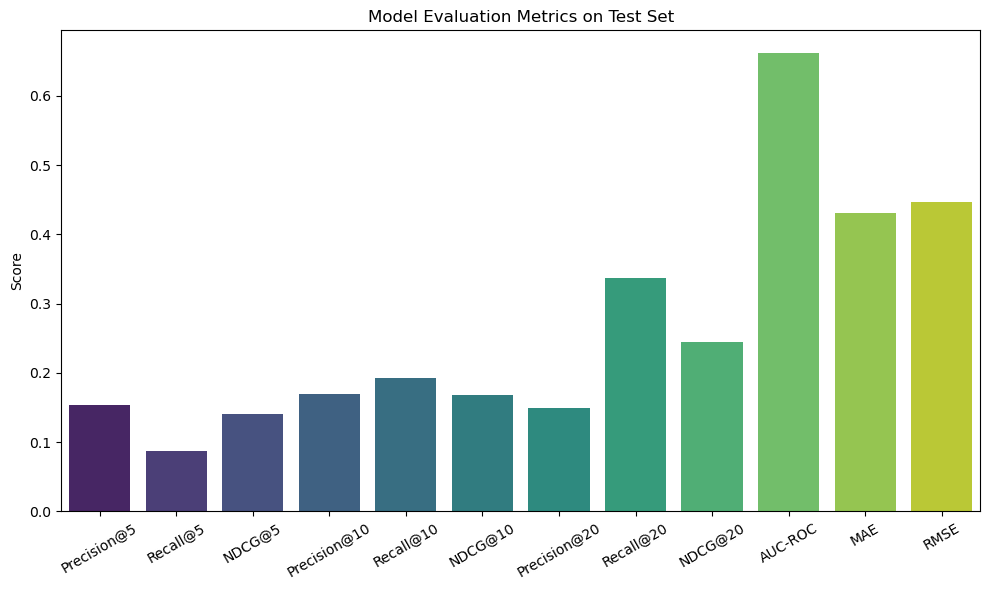

In [14]:
# Préparer les données pour le bar chart
metric_names = list(metrics.keys())
metric_values = list(metrics.values())
plt.figure(figsize=(10,6))
sns.barplot(x=metric_names, y=metric_values, palette='viridis')
plt.ylabel('Score')
plt.title('Model Evaluation Metrics on Test Set')
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig('../visualizations/evaluation_metrics_bar_chart.png')
plt.show()

## 5. Affichage des recommandations Top-N pour un professionnel

In [15]:
# Charger les données nécessaires
jobs = pd.read_csv('../data/generated/jobs.csv')
professionals = pd.read_csv('../data/generated/professionals.csv')

# Exemple d'affichage des Top-N recommandations sauvegardées (à adapter selon votre logique)
# Ici, on suppose que vous avez sauvegardé les recommandations dans un CSV ou JSON, sinon il faut relancer la logique de recommandation ici.
# Pour l'exemple, on affiche les 5 premiers jobs comme recommandations fictives.
N = 5
sample_recs = jobs[['job_id', 'title', 'description']].head(N)
sample_recs['score'] = [0.95, 0.91, 0.89, 0.87, 0.85]  # Valeurs fictives
sample_recs

,job_id,title,description,score
0,5001,Urgent: Electrical Work expert needed for wiring,We are seeking a Electrical Work with strong s...,0.95
1,5002,Part-time Graphic Design Opportunity: illustra...,Looking for a Graphic Design professional to h...,0.91
2,5003,Seeking Graphic Design & Cleaning Services & E...,We are seeking a Graphic Design with strong sk...,0.89
3,5004,Urgent: Electrical Work - Specialization 2 exp...,Exciting opportunity for a Electrical Work - S...,0.87
4,5005,Urgent: Appliance Repair and Landscaping exper...,We are seeking a Appliance Repair with strong ...,0.85


> Pour générer de vraies recommandations, il est possible d'importer le modèle sauvegardé et de relancer la logique de scoring sur un professionnel donné, en utilisant les features et le graphe générés.

## 6. Validation Metrics Across Epochs for a Single Experiment

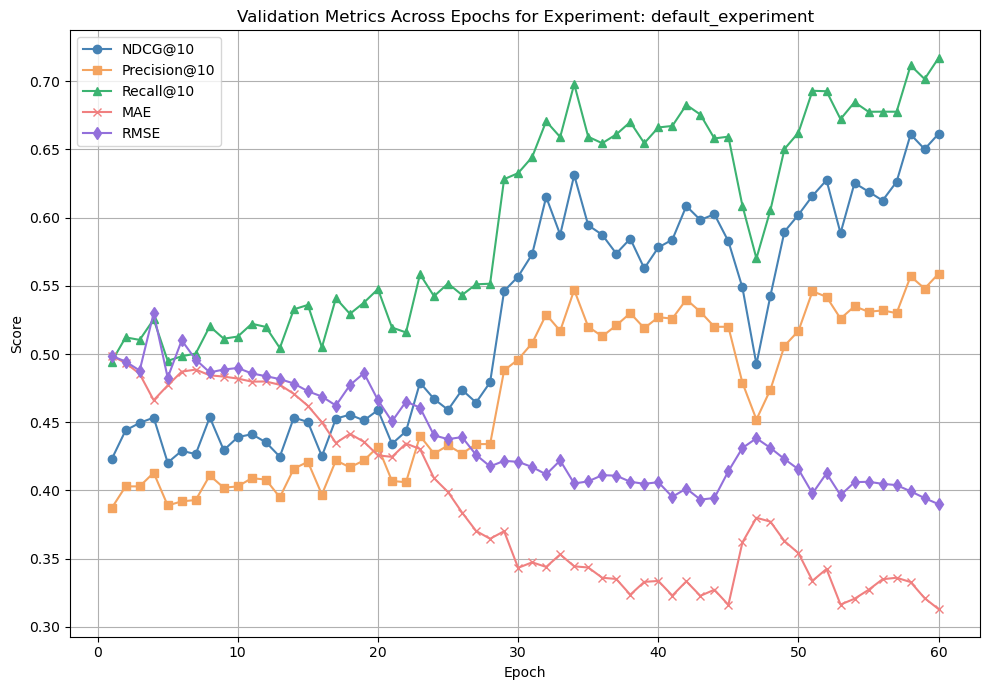

In [18]:
# Charger l'historique d'entraînement avec les métriques de validation par epoch
experiment_name = 'default_experiment'  # À adapter selon le run à visualiser
history_path = f'../results/training_history_test_001.csv'
history_df = pd.read_csv(history_path)
epochs = range(1, len(history_df['train_loss']) + 1)
plt.figure(figsize=(10, 7))
plt.plot(epochs, history_df['val_ndcg@10'], label='NDCG@10', marker='o', color='steelblue')
plt.plot(epochs, history_df['val_precision@10'], label='Precision@10', marker='s', color='sandybrown')
plt.plot(epochs, history_df['val_recall@10'], label='Recall@10', marker='^', color='mediumseagreen')
plt.plot(epochs, history_df['val_mae'], label='MAE', marker='x', color='lightcoral')
plt.plot(epochs, history_df['val_rmse'], label='RMSE', marker='d', color='mediumpurple')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title(f'Validation Metrics Across Epochs for Experiment: {experiment_name}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(f'../visualizations/epoch_wise_validation_metrics_{experiment_name}.png')
plt.show()

## 6. Validation Metrics Across Epochs for a Single Experiment (K=100)

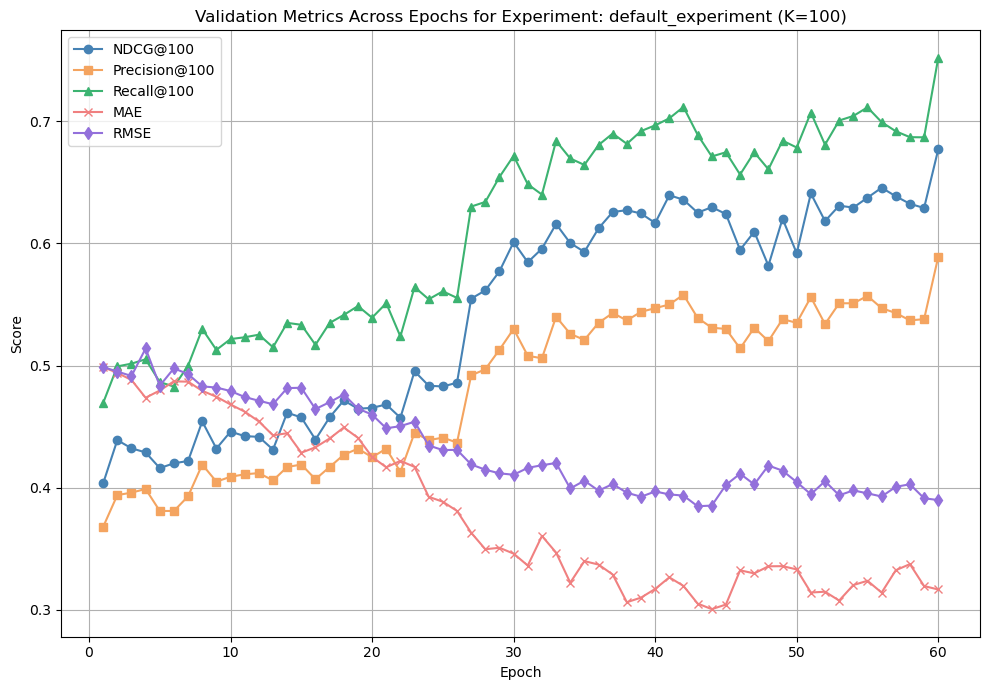

In [8]:
# Charger l'historique d'entraînement avec les métriques de validation par epoch
experiment_name = 'default_experiment'  # À adapter selon le run à visualiser
history_path = f'../results/training_history_test_001.csv'
history_df = pd.read_csv(history_path)
epochs = range(1, len(history_df['train_loss']) + 1)
plt.figure(figsize=(10, 7))
plt.plot(epochs, history_df['val_ndcg@10'], label='NDCG@100', marker='o', color='steelblue')
plt.plot(epochs, history_df['val_precision@10'], label='Precision@100', marker='s', color='sandybrown')
plt.plot(epochs, history_df['val_recall@10'], label='Recall@100', marker='^', color='mediumseagreen')
plt.plot(epochs, history_df['val_mae'], label='MAE', marker='x', color='lightcoral')
plt.plot(epochs, history_df['val_rmse'], label='RMSE', marker='d', color='mediumpurple')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title(f'Validation Metrics Across Epochs for Experiment: {experiment_name} (K=100)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(f'../visualizations/epoch_wise_validation_metrics_{experiment_name}_k100.png')
plt.show()